<a href="https://colab.research.google.com/github/nshkwon/Side-ML-Projects/blob/main/nlp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews?select=test.ft.txt.bz2

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/train.ft.txt', delimiter='\t', quoting=3, header=None, names=['text'])

# Split text into label and review columns only if not done already
if 'label' not in dataset.columns or 'review' not in dataset.columns:
    dataset[['label', 'review']] = dataset['text'].str.split(pat=' ', n=1, expand=True)
    dataset['label'] = dataset['label'].map({'__label__1': 0, '__label__2': 1})
    dataset.drop(columns=['text'], inplace=True)

# Check if there are any rows that weren't correctly processed
print("Rows with unprocessed labels:", dataset[dataset['label'].isnull()].shape[0])

Rows with unprocessed labels: 0


In [ ]:
dataset.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
dataset.shape

(85797, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85797 entries, 0 to 85796
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   85797 non-null  int64 
 1   review  85797 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

In [ ]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [ ]:
#dataset.dropna(inplace=True)

In [ ]:
#dataset.isnull().values.any()

In [ ]:
dataset.shape

(85797, 2)

In [ ]:
dataset.describe()

,label
count,85797.000000
mean,0.513281
std,0.499826
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

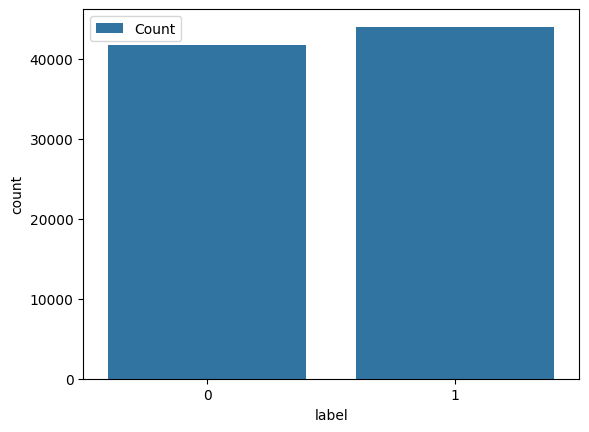

In [ ]:
sns.countplot(data=dataset, x=dataset.label, label='Count')
plt.show

In [ ]:
(dataset.label == 1).sum()

44038

In [ ]:
(dataset.label == 0).sum()

41759

# length of message

In [ ]:
dataset['Length'] = dataset['review'].apply(len)

In [ ]:
dataset.head()

,label,review,Length
0,1,Stuning even for the non-gamer: This sound tra...,426
1,1,The best soundtrack ever to anything.: I'm rea...,509
2,1,Amazing!: This soundtrack is my favorite music...,760
3,1,Excellent Soundtrack: I truly like this soundt...,743
4,1,"Remember, Pull Your Jaw Off The Floor After He...",481


<Axes: ylabel='Frequency'>

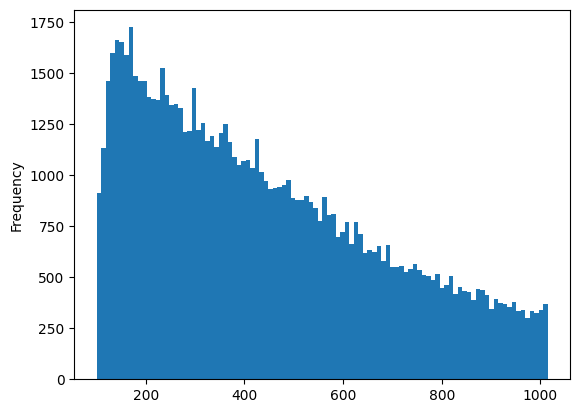

In [ ]:
# histogram
dataset['Length'].plot(bins=100, kind='hist')

In [ ]:
dataset.Length.describe()

count    85797.000000
mean       440.190426
std        240.694252
min        101.000000
25%        236.000000
50%        394.000000
75%        609.000000
max       1015.000000
Name: Length, dtype: float64

In [ ]:
# Longest message
dataset[dataset["Length"] ==1015]['review'].iloc[0]

"Dry and Humorless: I totally disagree with the reviewer from Hongkong who must have been writing about some other book when she portrayed Infatuation as funny and sexy, with witty dialogues and hot passion. As it happens, most of the book is devoted to a character analysis of Judith. In a nut shell, Judith knows that she is an ugly duckling with incredible brain power. We don't see any real attraction developing between Luke and Judith until the last quarter of the book. And then when it does, the author's analysis of Judith is vindicated for she is accepted by Luke because of her brainy self rather than her looks. The most tragicomedical line of the book must be when Luke agrees with Judith that she is not beautiful. Disappointingly for me, just when I'm getting interested in the story in the last quarter of the book, the plot reaches its climax and comes to an end. The story is dry and tends to drag on. I must say that the writing is good as can be expected from Charlotte Lamb. I ga

In [ ]:
# Shortest message
dataset[dataset["Length"] ==101]['review'].iloc[0]

'dont know!: the program looks fun but the software i recieved was corupt it wont load on any machine.'

In [ ]:
positive = dataset[dataset['label'] ==1]

In [ ]:
negative = dataset[dataset['label'] ==0]

In [ ]:
positive

,label,review,Length
0,1,Stuning even for the non-gamer: This sound tra...,426
1,1,The best soundtrack ever to anything.: I'm rea...,509
2,1,Amazing!: This soundtrack is my favorite music...,760
3,1,Excellent Soundtrack: I truly like this soundt...,743
4,1,"Remember, Pull Your Jaw Off The Floor After He...",481
...,...,...,...
85784,1,Worked just great in Australia!: I was able to...,201
85792,1,A Traveler's Dream: Another reviewer had said ...,423
85793,1,Extremely Useful in India: I bought two of the...,741
85794,1,An Easy-To-Use Adapter But With Limitations: T...,870


In [ ]:
negative

,label,review,Length
6,0,"Buyer beware: This is a self-published book, a...",738
10,0,The Worst!: A complete waste of time. Typograp...,216
13,0,Oh please: I guess you have to be a romance no...,492
14,0,Awful beyond belief!: I feel I have to write t...,692
15,0,Don't try to fool us with fake reviews.: It's ...,304
...,...,...,...
85788,0,"Low power only,: This adapter is very convenie...",249
85789,0,did not work at all: I was hoping to do a lot ...,255
85790,0,DOES NOT WORK WITH DELL LAPTOPS: I'm not sure ...,165
85791,0,I literally can't use it: I bought my laptop i...,390


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus =[]

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

1000

# Back of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:1000, 0].values

In [ ]:
x.shape

(1000, 1500)

In [ ]:
y.shape

(1000,)

# Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

In [ ]:
x_train.shape

(800, 1500)

In [ ]:
y_test.shape

(200,)

# Model

naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print(acc*100)

63.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64 43]
 [31 62]]


xgb

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier_xgb.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

79.5


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 20]
 [21 72]]
